## How to empower coaches to make future decision based on the present data.
* Do players really "get hot"?
	* Does making one shot make it more or less likely that they will make the next?
		* Is the above true for *all* players?
		* Are some player's inherently/apparently "streaky"?
	* By what metrics should we see to find this truth?
		* 3 PT
        
## And 1 and clutchness

## 

Does making a shot make it more or less likely that they make the next? Or does it not matter? 

Everything averages out in the end, right?

Getting play-by-play data
Github: https://github.com/dblackrun/pbpstats

Documentation: https://pbpstats.readthedocs.io/en/latest/quickstart.html



In [1]:
#if you want to use the API to gather this data, install the req modules
#pip install pbpstats

I decided to download the data instead

Made shot vs not made

The NBA's Game ID, is a 10-digit code: XXXYYGGGGG, where...
* XXX refers to a season prefix
* YY is the season year (e.g. 14 for 2014-15)
* GGGGG refers to the game number (1-1230 for a full 30-team regular season)

How to measure a player's streakyness
* Do streaky players have large slumps?
* Do non-streaky players make at least one shot a game?
* How far off are they from the medium? (standard deviations)

Let's just look at average 3pt percentage in any given season.

In [4]:
import pandas as pd

In [5]:
#average 3pt makes/attempts = % for the last 20 seasons

#scrape https://www.basketball-reference.com/leagues/NBA_stats_per_game.html
dfs = pd.read_html("https://www.basketball-reference.com/leagues/NBA_stats_per_game.html")


In [ ]:
dfs

In [9]:
df = dfs[0]

In [11]:
df.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Season                 Lg   
0                   1            2022-23                NBA   
1                   2            2021-22                NBA   
2                   3            2020-21                NBA   
3                   4            2019-20                NBA   
4                   5            2018-19                NBA   
5                   6            2017-18                NBA   
6                   7            2016-17                NBA   
7                   8            2015-16                NBA   
8                   9            2014-15                NBA   
9                  10            2013-14                NBA   
10                 11            2012-13                NBA   
11                 12            2011-12                NBA   
12                 13            2010-11                NBA   
13                 14            2009-10                NBA   
14                 15            2008-09                NBA   
15                 16            2007-08                NBA   
16                 17            2006-07                NBA   
17                 18            2005-06                NBA   
18                 19            2004-05                NBA   
19                 20            2003-04                NBA   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                  Age                 Ht                 Wt   
0                26.1                6-7                216   
1                26.1                6-6                215   
2                26.1                6-6                217   
3                26.1                6-6                218   
4                26.3                6-6                219   
5                26.4                6-7                220   
6                26.6                6-7                221   
7                26.7                6-7                222   
8                26.7                6-7                223   
9                26.5                6-7                223   
10               26.7                6-7                223   
11               26.6                6-7                223   
12               26.6                6-7                223   
13               26.6                6-7                222   
14               26.6                6-7                221   
15               26.8                6-7                220   
16               26.6                6-7                219   
17               26.5                6-7                220   
18               26.9                6-7                220   
19               27.0                6-7                220   

   Unnamed: 6_level_0 Per Game              ...        Shooting              \
                    G       MP    FG   FGA  ...    PTS      FG%   3P%   FT%   
0                1230    241.8  42.0  88.3  ...  114.7     .475  .361  .782   
1                1230    241.4  40.6  88.1  ...  110.6     .461  .354  .775   
2                1080    241.4  41.2  88.4  ...  112.1     .466  .367  .778   
3                1059    241.8  40.9  88.8  ...  111.8     .460  .358  .773   
4                1230    241.6  41.1  89.2  ...  111.2     .461  .355  .766   
5                1230    241.4  39.6  86.1  ...  106.3     .460  .362  .767   
6                1230    241.6  39.0  85.4  ...  105.6     .457  .358  .772   
7                1230    241.8  38.2  84.6  ...  102.7     .452  .354  .757   
8                1230    242.0  37.5  83.6  ...  100.0     .449  .350  .750   
9                1230    242.0  37.7  83.0  ...  101.0     .454  .360  .756   
10               1229    241.9  37.1  82.0  ...   98.1     .453  .359  .753   
11                990    241.9  36.5  81.4  ...   96.3     .448  .349  .752   
12               1230    241.9  37.2  81.2  ...   99.6     .459  .358  .763   
13               1230    241.7  37.7  81.7  

In [75]:
#drop the unnecessary multilevel column
df.columns=df.columns.droplevel()

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [76]:
df.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg'],
      dtype='object')

In [81]:
df = df.sort_values("Season", ascending=True)
del df[["Rk", "Lg"]]
df

,Season,Age,Ht,Wt,G,MP,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
19,2003-04,27.0,6-7,220,1189,241.7,35.0,79.8,5.2,14.9,...,93.4,0.439,0.347,0.752,90.1,0.471,14.2,28.6,0.228,102.9
18,2004-05,26.9,6-7,220,1230,241.9,35.9,80.3,5.6,15.8,...,97.2,0.447,0.356,0.756,90.9,0.482,13.6,28.7,0.245,106.1
17,2005-06,26.5,6-7,220,1230,242.1,35.8,79.0,5.7,16.0,...,97.0,0.454,0.358,0.745,90.5,0.490,13.7,27.3,0.248,106.2
16,2006-07,26.6,6-7,219,1230,242.2,36.5,79.7,6.1,16.9,...,98.7,0.458,0.358,0.752,91.9,0.496,14.2,27.1,0.246,106.5
15,2007-08,26.8,6-7,220,1230,241.5,37.3,81.5,6.6,18.1,...,99.9,0.457,0.362,0.755,92.4,0.497,13.2,26.7,0.231,107.5
14,2008-09,26.6,6-7,221,1230,241.7,37.1,80.9,6.6,18.1,...,100.0,0.459,0.367,0.771,91.7,0.500,13.3,26.7,0.236,108.3
13,2009-10,26.6,6-7,222,1230,241.7,37.7,81.7,6.4,18.1,...,100.4,0.461,0.355,0.759,92.7,0.501,13.3,26.3,0.228,107.6
12,2010-11,26.6,6-7,223,1230,241.9,37.2,81.2,6.5,18.0,...,99.6,0.459,0.358,0.763,92.1,0.498,13.4,26.4,0.229,107.3
11,2011-12,26.6,6-7,223,990,241.9,36.5,81.4,6.4,18.4,...,96.3,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6
10,2012-13,26.7,6-7,223,1229,241.9,37.1,82.0,7.2,20.0,...,98.1,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8


In [82]:
df.dtypes

Season     object
Age       float64
Ht         object
Wt          int64
G           int64
MP        float64
FG        float64
FGA       float64
3P        float64
3PA       float64
FT        float64
FTA       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
FG%       float64
3P%       float64
FT%       float64
Pace      float64
eFG%      float64
TOV%      float64
ORB%      float64
FT/FGA    float64
ORtg      float64
dtype: object

In [83]:
df = df.apply(pd.to_numeric, errors="ignore")
df.dtypes

Season     object
Age       float64
Ht         object
Wt          int64
G           int64
MP        float64
FG        float64
FGA       float64
3P        float64
3PA       float64
FT        float64
FTA       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
FG%       float64
3P%       float64
FT%       float64
Pace      float64
eFG%      float64
TOV%      float64
ORB%      float64
FT/FGA    float64
ORtg      float64
dtype: object

In [94]:
#focus on the last 20 years
df= df.head(20)

In [95]:
df[["Season", "3PA", "3P", "3P%"]]

,Season,3PA,3P,3P%
19,2003-04,14.9,5.2,0.347
18,2004-05,15.8,5.6,0.356
17,2005-06,16.0,5.7,0.358
16,2006-07,16.9,6.1,0.358
15,2007-08,18.1,6.6,0.362
14,2008-09,18.1,6.6,0.367
13,2009-10,18.1,6.4,0.355
12,2010-11,18.0,6.5,0.358
11,2011-12,18.4,6.4,0.349
10,2012-13,20.0,7.2,0.359


In [86]:
import matplotlib.pyplot as plt

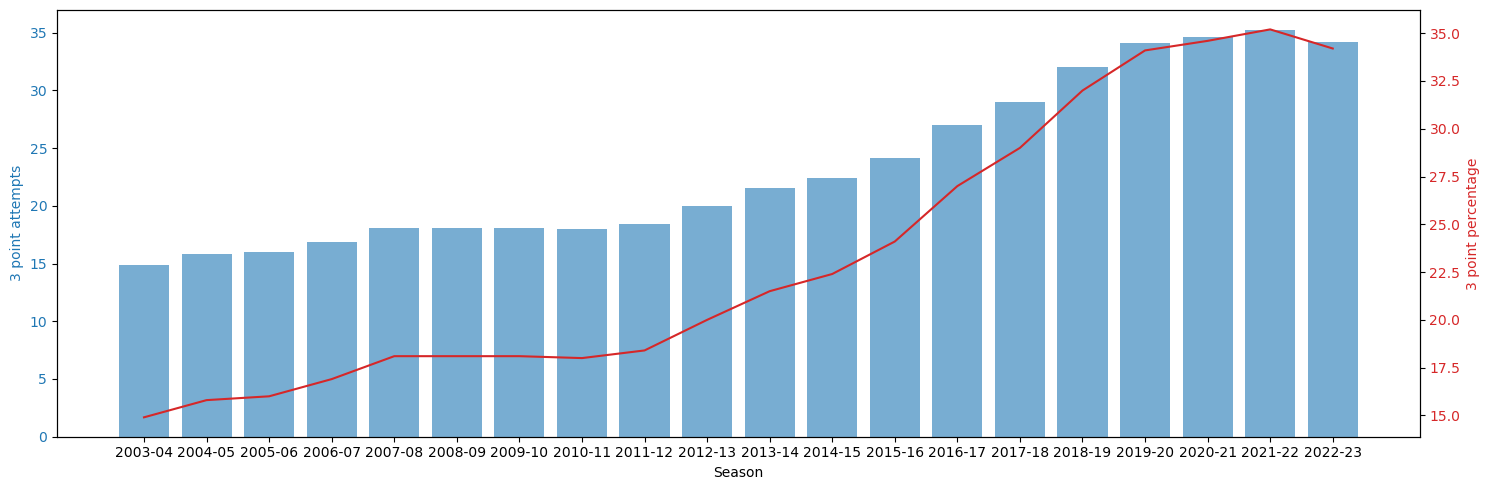

In [116]:
fig, ax1 = plt.subplots(figsize=(15, 5))

# start of second plot (bar-3PA-blue)
color = 'tab:blue'
ax1.set_xlabel('Season')
ax1.set_ylabel('3 point attempts', color=color)
ax1.bar(df['Season'], df["3PA"], color=color, width=0.8, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# start of second plot (line-3P%-red)
color = 'tab:red'
# we already handled the x-label with ax1
# ax1.set_xlabel('Season')
ax2.set_ylabel('3 point percentage', color=color)  
ax2.plot(df['Season'], df['3PA'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()